## Decision Tree / Random Forest Project

### Lending Data from 2007-2010
- classify and predict whether or not the borrower paid back their loan in full

### features
* credit.policy: 1 if the customer meets the credit underwriting criteria of LendingClub.com, and 0 otherwise.
* purpose: The purpose of the loan (takes values "credit_card", "debt_consolidation", "educational", "major_purchase", "small_business", and "all_other").
* int.rate: The interest rate of the loan, as a proportion (a rate of 11% would be stored as 0.11). Borrowers judged by LendingClub.com to be more risky are assigned higher interest rates.
* installment: The monthly installments owed by the borrower if the loan is funded.
* log.annual.inc: The natural log of the self-reported annual income of the borrower.
* dti: The debt-to-income ratio of the borrower (amount of debt divided by annual income).
* fico: The FICO credit score of the borrower.
* days.with.cr.line: The number of days the borrower has had a credit line.
* revol.bal: The borrower's revolving balance (amount unpaid at the end of the credit card billing cycle).
* revol.util: The borrower's revolving line utilization rate (the amount of the credit line used relative to total credit available).
* inq.last.6mths: The borrower's number of inquiries by creditors in the last 6 months.
* delinq.2yrs: The number of times the borrower had been 30+ days past due on a payment in the past 2 years.
* pub.rec: The borrower's number of derogatory public records (bankruptcy filings, tax liens, or judgments).
* not.fully.paid: 0 fully paid, 1 not fully paid 


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline
sns.set()

In [3]:
df = pd.read_csv('loan_data.csv')
df.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [4]:
df.tail()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
9573,0,all_other,0.1461,344.76,12.180755,10.39,672,10474.000000,215372,82.1,2,0,0,1
9574,0,all_other,0.1253,257.70,11.141862,0.21,722,4380.000000,184,1.1,5,0,0,1
9575,0,debt_consolidation,0.1071,97.81,10.596635,13.09,687,3450.041667,10036,82.9,8,0,0,1
9576,0,home_improvement,0.1600,351.58,10.819778,19.18,692,1800.000000,0,3.2,5,0,0,1
9577,0,debt_consolidation,0.1392,853.43,11.264464,16.28,732,4740.000000,37879,57.0,6,0,0,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [6]:
df.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


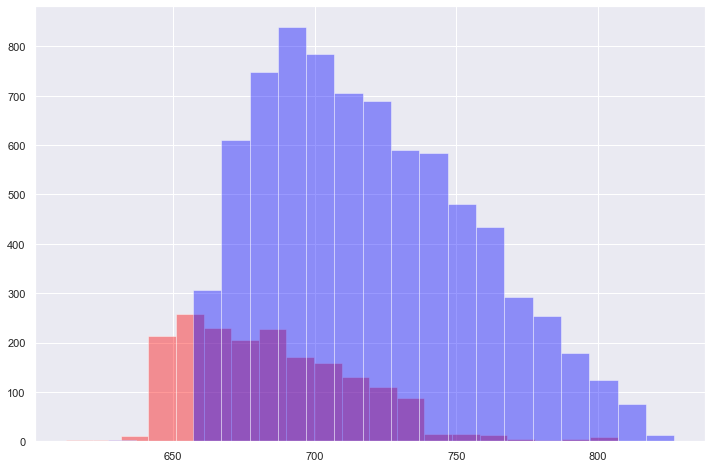

In [7]:
# histogram of two FICO distributions on top of each other, one for each credit.policy outcome
plt.figure(figsize=(12,8))
df[df['credit.policy']==0]['fico'].hist(color='red', bins=20, alpha=0.4)
df[df['credit.policy']==1]['fico'].hist(color='blue', bins=20, alpha=0.4)
plt.show()

In [8]:
fico_cp0 = df.loc[df['credit.policy']==0]['fico']
fico_cp1 = df.loc[df['credit.policy']==1]['fico']

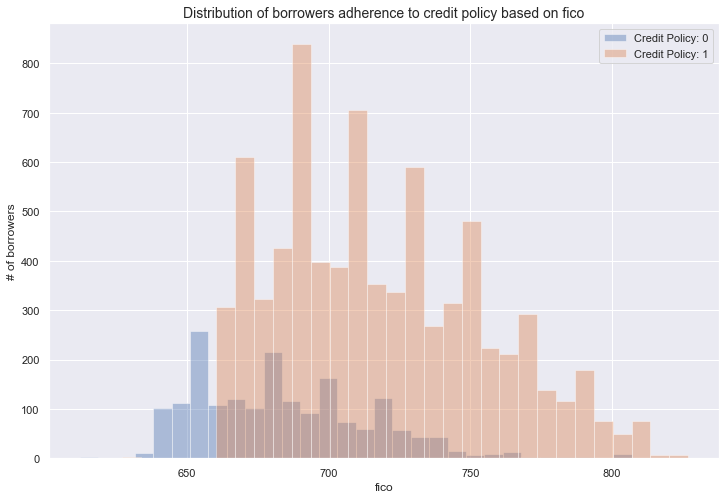

In [9]:
plt.figure(figsize=(12,8))
sns.distplot(fico_cp0, kde=False, bins=30, label='Credit Policy: 0')
sns.distplot(fico_cp1, kde=False, bins=30, label='Credit Policy: 1')
plt.title('Distribution of borrowers adherence to credit policy based on fico', fontdict={'size':14})
plt.ylabel('# of borrowers')
plt.legend()
plt.show()

In [10]:
df['not.fully.paid'].value_counts()

0    8045
1    1533
Name: not.fully.paid, dtype: int64

In [11]:
#0 fully paid
#1 not fully paid 

nfp0 = df.loc[df['not.fully.paid']==0]['fico']
nfp1 = df.loc[df['not.fully.paid']==1]['fico']

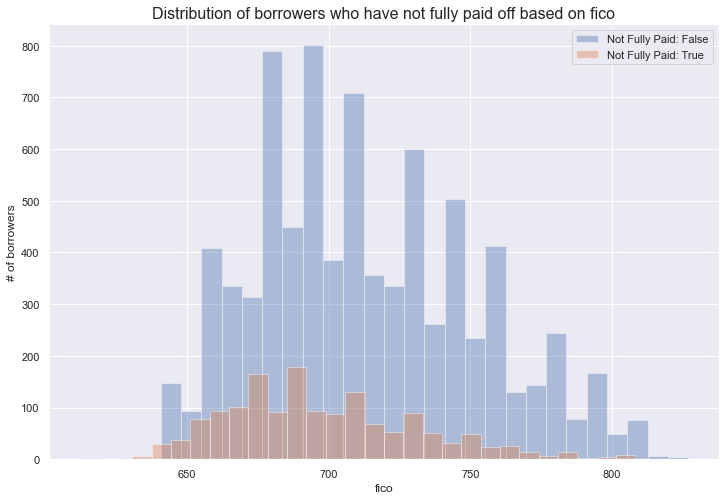

In [12]:
plt.figure(figsize=(12,8))
sns.distplot(nfp0, kde=False, bins=30, label='Not Fully Paid: False')
sns.distplot(nfp1, kde=False, bins=30, label='Not Fully Paid: True')
plt.title('Distribution of borrowers who have not fully paid off based on fico', fontdict={'size':16})
plt.legend()
plt.ylabel('# of borrowers')
plt.show()

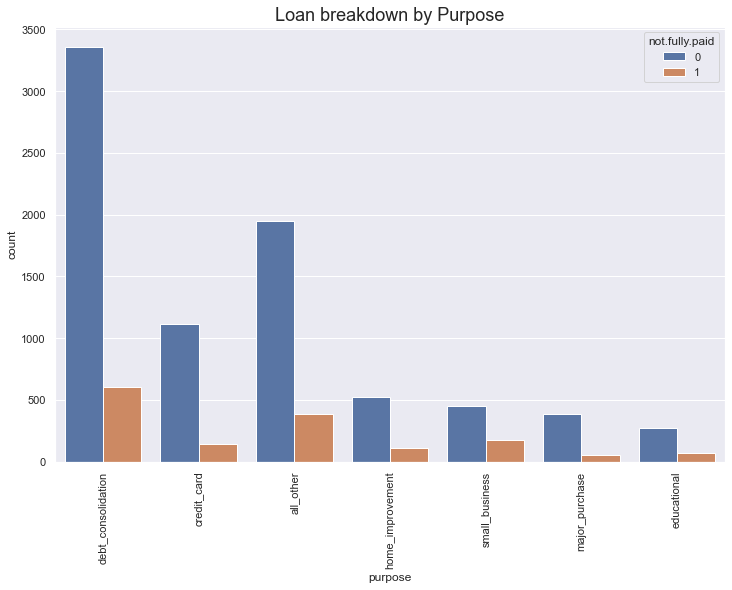

In [13]:
plt.figure(figsize=(12,8))
sns.countplot(x = df['purpose'], hue=df['not.fully.paid'])
plt.title('Loan breakdown by Purpose', fontdict={'size':18})
plt.xticks(rotation=90)
plt.show()

<Figure size 864x576 with 0 Axes>

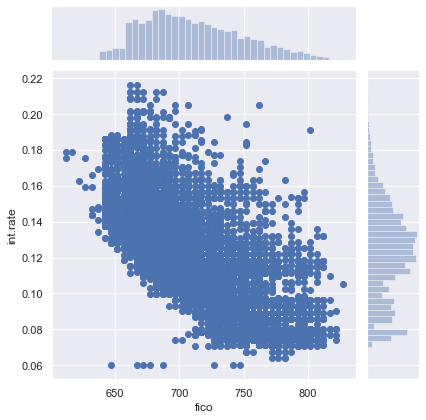

In [14]:
#trend between FICO score and interest rate - negative relationship
plt.figure(figsize=(12,8))
sns.jointplot(x=df['fico'], y=df['int.rate'])

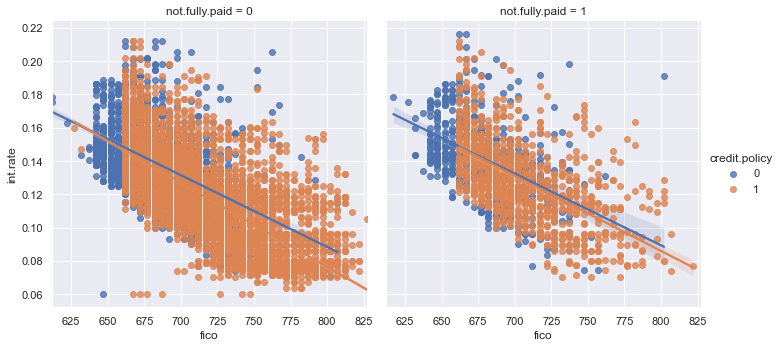

In [15]:
# lmplots to see if the trend differed between not.fully.paid and credit.policy

sns.lmplot(x ='fico', y='int.rate', data=df, col='not.fully.paid', hue='credit.policy')

In [16]:
#dummies - loan purpose column
df_final = pd.get_dummies(df, drop_first=True, columns=['purpose'], prefix='purpose', prefix_sep=':')

In [17]:
df_final

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose:credit_card,purpose:debt_consolidation,purpose:educational,purpose:home_improvement,purpose:major_purchase,purpose:small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,0,1,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,1,0,0,0,0,0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,0,1,0,0,0,0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,0,1,0,0,0,0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9573,0,0.1461,344.76,12.180755,10.39,672,10474.000000,215372,82.1,2,0,0,1,0,0,0,0,0,0
9574,0,0.1253,257.70,11.141862,0.21,722,4380.000000,184,1.1,5,0,0,1,0,0,0,0,0,0
9575,0,0.1071,97.81,10.596635,13.09,687,3450.041667,10036,82.9,8,0,0,1,0,1,0,0,0,0
9576,0,0.1600,351.58,10.819778,19.18,692,1800.000000,0,3.2,5,0,0,1,0,0,0,1,0,0


In [18]:
from sklearn.model_selection import train_test_split

In [19]:
df_final.columns.values

array(['credit.policy', 'int.rate', 'installment', 'log.annual.inc',
       'dti', 'fico', 'days.with.cr.line', 'revol.bal', 'revol.util',
       'inq.last.6mths', 'delinq.2yrs', 'pub.rec', 'not.fully.paid',
       'purpose:credit_card', 'purpose:debt_consolidation',
       'purpose:educational', 'purpose:home_improvement',
       'purpose:major_purchase', 'purpose:small_business'], dtype=object)

In [21]:
X = df_final.drop('not.fully.paid', axis=1)
y = df_final['not.fully.paid']

In [22]:
X_train, X_test, y_train,y_test = train_test_split(X,y, random_state = 42, test_size=0.2)

In [23]:
from sklearn.tree import DecisionTreeClassifier

In [24]:
dtc = DecisionTreeClassifier()

In [25]:
dtc.fit(X_train, y_train)

DecisionTreeClassifier()

In [26]:
pred = dtc.predict(X_test)

In [27]:
from sklearn.metrics import classification_report, confusion_matrix

In [28]:
print(confusion_matrix(y_test, pred))
print('\n')
print(classification_report(y_test,pred))

[[1353  258]
 [ 233   72]]


              precision    recall  f1-score   support

           0       0.85      0.84      0.85      1611
           1       0.22      0.24      0.23       305

    accuracy                           0.74      1916
   macro avg       0.54      0.54      0.54      1916
weighted avg       0.75      0.74      0.75      1916



In [29]:
pd.DataFrame(confusion_matrix(y_test, pred), columns=['Pred 0','Pred 1'],
index=['Actual 0', 'Actual 1'])

,Pred 0,Pred 1
Actual 0,1353,258
Actual 1,233,72


In [30]:
#random forest model

from sklearn.ensemble import RandomForestClassifier

In [31]:
rfc = RandomForestClassifier(n_estimators=200)

In [32]:
rfc.fit(X_train,y_train)

RandomForestClassifier(n_estimators=200)

In [33]:
pred_rfc = rfc.predict(X_test)

In [34]:
print(confusion_matrix(y_test, pred_rfc))
print('\n')
print(classification_report(y_test, pred_rfc))

[[1602    9]
 [ 301    4]]


              precision    recall  f1-score   support

           0       0.84      0.99      0.91      1611
           1       0.31      0.01      0.03       305

    accuracy                           0.84      1916
   macro avg       0.57      0.50      0.47      1916
weighted avg       0.76      0.84      0.77      1916



In [35]:
pd.DataFrame(confusion_matrix(y_test, pred_rfc), columns=['Pred 0','Pred 1'], index = ['Actual 0', 'Actual 1'])

,Pred 0,Pred 1
Actual 0,1602,9
Actual 1,301,4


overall random forest performed better than decision tree as indicated in the two matrices above
 - reduced false positive (predicted borrower did not fully pay off while actually paid off) while increasing true positive
 - however it also increased false negative, indicating that the borrower was predicted to have paid off loan but actually did not fully pay off 